In [3]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, parent_dir) 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from toolbox import make_vocabulary

In [26]:
dict_words_boxes = load_data("../data/dict_words_boxes.json")

In [27]:
vocabulary, frequency = make_vocabulary(dict_words_boxes)

In [28]:
#making dataframe of the dictionary frequency
frequency_df = pd.DataFrame.from_dict(frequency, orient='index')

In [29]:
frequency_df.columns = ['freq']

In [30]:
len(frequency_df)

4237

Text(0,0.5,'Frequency')

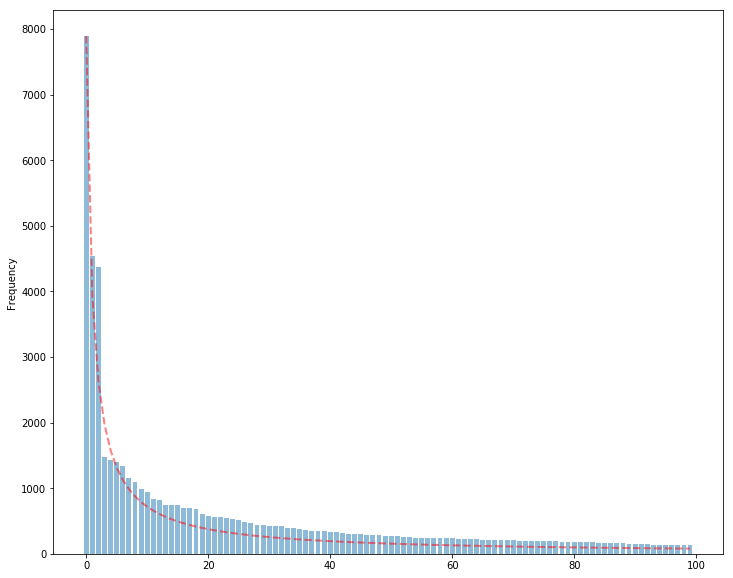

In [31]:
top_what = 100

y_pos = np.arange(top_what)
plt.figure(figsize=(12,10))
s = 1
expected_zipf = [frequency_df.sort_values(by='freq', ascending=False)['freq'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, frequency_df.sort_values(by='freq', ascending=False)['freq'][:top_what], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
#plt.title('Top 500 words')

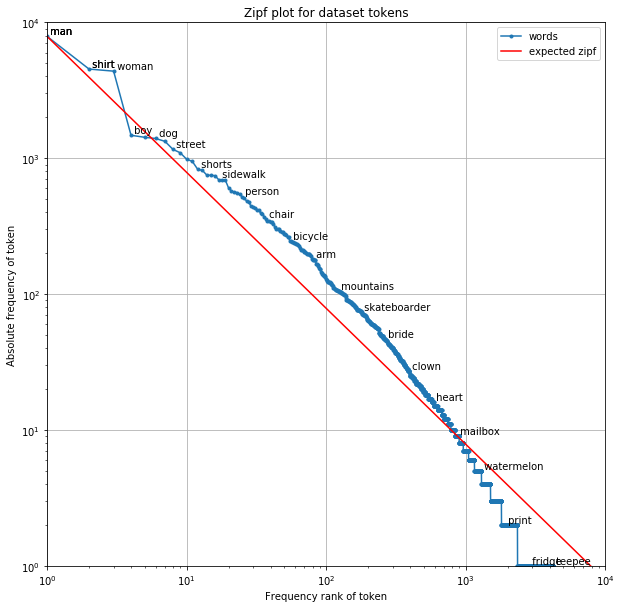

In [32]:
from pylab import *
counts = frequency_df.freq
tokens = frequency_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
pmf = plt.figure(figsize=(10,10))
plt.ylim(1,10**4)
plt.xlim(1,10**4)
loglog(ranks, frequencies, marker=".", label='words')
plt.plot([1,frequencies[0]],[frequencies[0],1],color='red', label='expected zipf')
title("Zipf plot for dataset tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")
plt.legend(loc='upper right') # the legend needed to be added to the plot
pmf.savefig('Zipf\'s Probability Mass Function.svg', bbox_inches='tight', format='svg')
pmf.savefig('Zipf\'s Probability Mass Function.pdf', bbox_inches='tight', format='pdf')
pmf.savefig('Zipf\'s Probability Mass Function.png', bbox_inches='tight', format='png', dpi = 300)

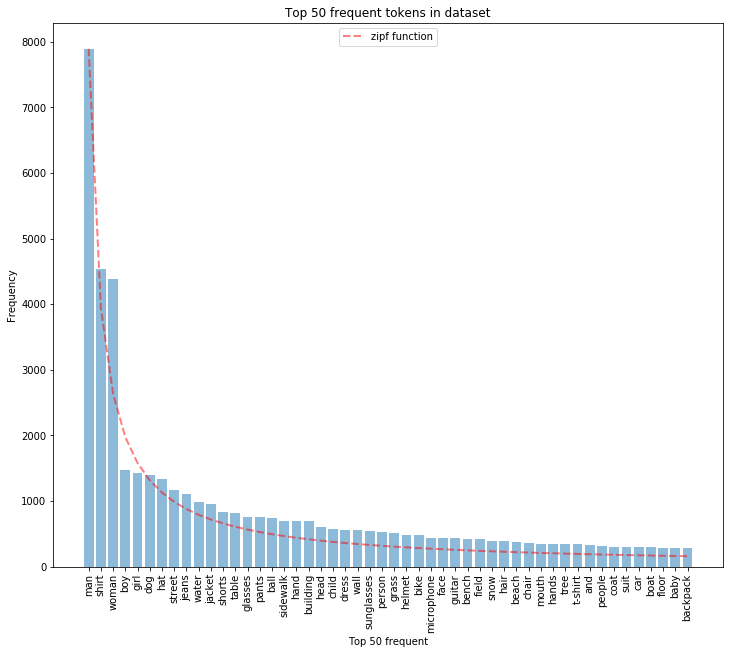

In [33]:
y_pos = np.arange(50)
figure = plt.figure(figsize=(12,10))

expected_zipf1 = [frequency_df.sort_values(by='freq', ascending=False)['freq'][0]/(i+1)**s for i in y_pos]

plt.bar(y_pos, frequency_df.sort_values(by='freq', ascending=False)['freq'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, frequency_df.sort_values(by='freq', ascending=False)['freq'][:50].index,rotation='vertical')
plt.plot(y_pos, expected_zipf1, label='zipf function', color='red', linestyle='--', linewidth=2, alpha=0.5)
plt.ylabel('Frequency')
plt.xlabel('Top 50 frequent')
plt.title('Top 50 frequent tokens in dataset')
plt.legend(loc='upper center') # the legend needed to be added to the plot

In [34]:
figure.savefig('Dataset Zipf\'s confirmation.svg', bbox_inches='tight', format='svg')
figure.savefig('Dataset Zipf\'s confirmation.pdf', bbox_inches='tight', format='pdf')
figure.savefig('Dataset Zipf\'s confirmation.png', bbox_inches='tight', format='png', dpi = 300)